In [1]:
# supervised machine learning
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae


In [6]:
import os
os.listdir()
df = pd.read_excel("Machine_v1.xlsx","Data")
df.head(11)

,YearsExp,YearEduc,Income
0,4,3,9000
1,0,3,9000
2,2,3,9000
3,8,8,24000
4,6,4,12000
5,7,8,24000
6,9,8,24000
7,3,3,9000
8,8,8,24000
9,9,8,24000


<Axes: xlabel='YearEduc', ylabel='Income'>

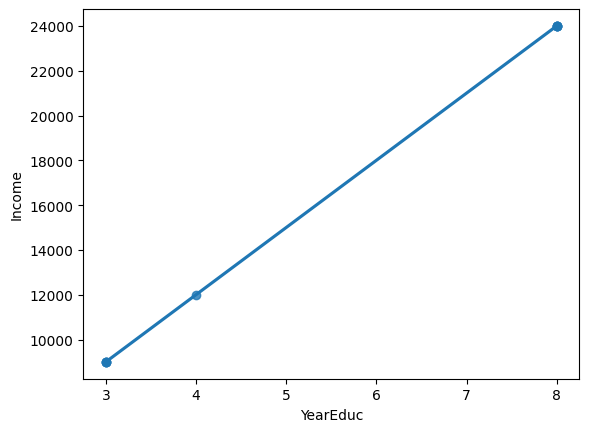

In [12]:
import seaborn as sns
sns.regplot(df,x = "YearEduc",y = "Income")

[[ 1.1370558   0.38447911]
 [ 2.07777667 -0.55624176]
 [ 1.60741624 -0.08588132]
 [-1.2666794  -0.13781436]
 [ 0.3740925   0.56223668]
 [-1.03149919 -0.37299458]
 [-1.50185962  0.09736585]
 [ 1.37223602  0.14929889]
 [-1.2666794  -0.13781436]
 [-1.50185962  0.09736585]]


<Axes: >

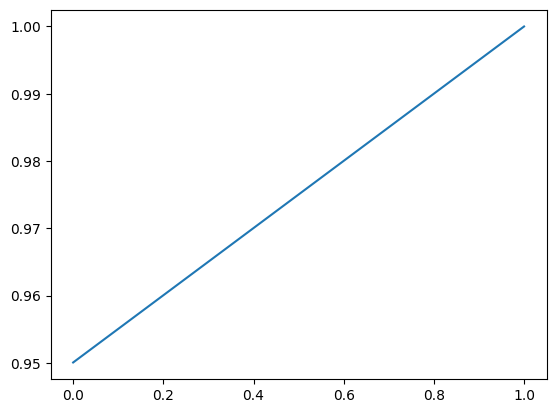

In [18]:
# PCA (principal component analysis)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()

x = df[["YearEduc","YearsExp"]]
scaled = scaler.fit_transform(x)

pca = PCA()
pca_trans = pca.fit_transform(scaled)

import numpy as np
z = np.cumsum(pca.explained_variance_ratio_)
print(pca_trans)
sns.lineplot(z)

<Axes: xlabel='Component1', ylabel='Income'>

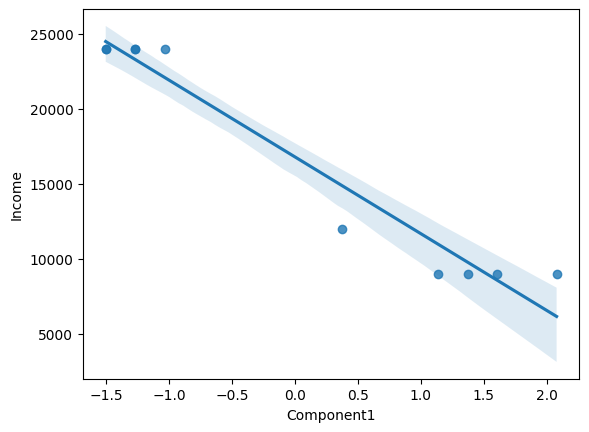

In [21]:
new = pd.DataFrame(pca_trans,columns = ['Component1',"Component2"])
new['Income'] = df['Income']
sns.regplot(new,x ="Component1",y = "Income" )

In [23]:
# get your y aand x ( inputs and outputs)
x = df[["YearEduc","YearsExp"]]
y = df['Income']
# split the data into training and testing
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2);print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)
# initialize and train the model
model = LinearRegression()
model.fit(x_train,y_train)
# evaluation of the model
pred = model.predict(x_test)
print(mae(pred,y_test))

(8, 2) (2, 2) (8,) (2,)
3.637978807091713e-12


# <font color = "cyan"> NLP (natural language processing) -  a brief introduction </font>

In [10]:
import pandas as pd
import os
! pip install wordcloud
import plotly_express as px
from wordcloud import WordCloud
print(os.listdir())
df = pd.read_excel('Cleaned tweets .xlsx')
df = df[['clean_string',"type",'language','sentiment']]
df.head()

['.DS_Store', '.ipynb_checkpoints', 'archive (1).zip', 'archive.zip', 'Assignment.ipynb', 'case_study.ipynb', 'Cleaned tweets .xlsx', 'diabetes.csv', 'lesson 5 _visualizations.ipynb', 'lesson1.ipynb', 'lesson2.ipynb', 'lesson3.ipynb', 'Lesson4.ipynb', 'lesson6.ipynb', 'Lessons in Excel v1.xlsx', 'loan.csv', 'MachineLearning.ipynb', 'Machine_v1.xlsx', 'MELBOURNE_HOUSE_PRICES_LESS.csv', 'Melbourne_housing_FULL.csv', 'oil  pricesdata Edited.xlsx', 'tested.csv', '~$Cleaned tweets .xlsx']


,clean_string,type,language,sentiment
0,yes tell coa identify players letting bench pl...,Normal,English,negative
1,fail call likes kai havertz chaloba rest keep ...,Normal,English,negative
2,let use yesterday game reference kepa reliable...,Normal,English,negative
3,sure potter gave green light signing players e...,Normal,English,neutral
4,come back top players like kai mount chaloba g...,Normal,English,negative


In [11]:
import numpy as np
df['language'] = df['language'].replace({"English and kiswahil":"Sheng",'D':np.nan,'Englishg':"English",'Eng;':"English",'Kiswahili':"Sheng",
                                        'English/swahili':"Sheng","Shang":"Sheng","Japanese":"Other","Gikuyu":"Other",'N/a':np.nan,'English/sheng':"Sheng",
                                         "Swahili":"Sheng", '':np.nan,'English/kiswahili':"Sheng",'Kiswahili/english':"Sheng"})
dt = df.copy()
dt = dt.dropna(subset = ['language'])
#-----------------------------------------------------------------------
dt['sentiment'] = dt['sentiment'] .fillna(np.nan)
dt['sentiment'] = dt['sentiment'].str.capitalize().str.strip()
dt = dt[dt['sentiment']!=""]
#----------------------------------------------------------------------
clean = []
for i in dt['type']:
    if i in ['advertisement', 'Advertisement','Advert', 'advert']:
        clean.append('Advert')
    else:
        clean.append("Normal")
dt['type'] = clean


In [24]:
y = dt['type'].value_counts()\
     .reset_index()
fig = px.pie(y,names = 'type',values = "count",
       color_discrete_sequence=px.colors.qualitative.Antique,title = "Advert tweets distribution")
fig.update_traces(hoverinfo='label+percent', textinfo='label+value+percent', 
                  insidetextorientation='radial',
                  textfont_size=16,
                  marker=dict( line=dict(color='#000000', width=2)))
fig. update_traces(showlegend=False)
fig.update_layout( title_x=0.5)

In [25]:
# clean the text


# visualize the data

# bag o words features

# machine learning

In [47]:
text = "John wore a red JACKET as he went to the market!!"
import nltk
from string import punctuation
# get the stopwords
stop = nltk.corpus.stopwords.words("english")
puct = list(punctuation)
stopwords = stop + puct

# tokenize sentenses
#text.split()
def cleaner(text):
    text = str(text).lower()
    words = nltk.word_tokenize(text)
    words = [word for word in words if not word in stopwords]
    
    return " ".join(words)

dt['tweets'] = dt['clean_string'].apply(cleaner)
dt.head()


,clean_string,type,language,sentiment,tweets
0,yes tell coa identify players letting bench pl...,Normal,English,Negative,yes tell coa identify players letting bench pl...
1,fail call likes kai havertz chaloba rest keep ...,Normal,English,Negative,fail call likes kai havertz chaloba rest keep ...
2,let use yesterday game reference kepa reliable...,Normal,English,Negative,let use yesterday game reference kepa reliable...
3,sure potter gave green light signing players e...,Normal,English,Neutral,sure potter gave green light signing players e...
4,come back top players like kai mount chaloba g...,Normal,English,Negative,come back top players like kai mount chaloba g...


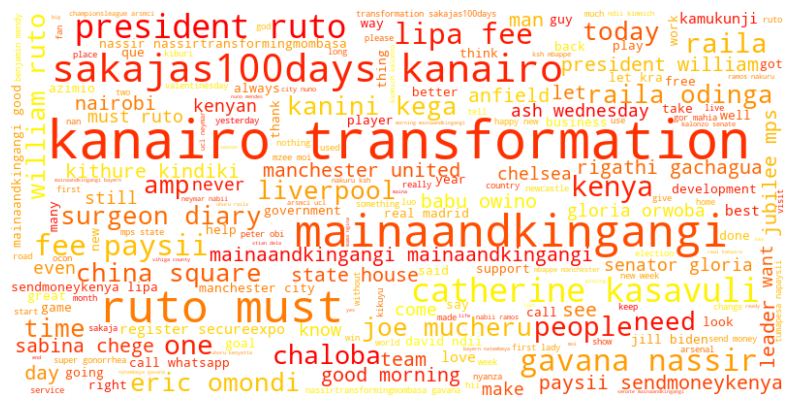

In [48]:
import matplotlib.pyplot as plt
def generate_wordcloud(text_column, colormap='viridis', background_color='white'):
    # Concatenate all the text in the column
    text = ' '.join(text_column.tolist())

    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color=background_color, colormap=colormap).generate(text)

    # Plot the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
generate_wordcloud(dt['tweets'],colormap="autumn")

In [50]:
words = []
for text in dt['tweets']:
    txt = nltk.word_tokenize(text)
    words+=txt


In [57]:
from collections import Counter
y = Counter(words).most_common(20)
y1 = pd.DataFrame(y).rename(columns = {0:'words',1:'n'})
px.line(y1,x = 'words',y = 'n')